In [24]:
# import libraries
import pandas as pd
import numpy as np
# for providing path
import os
print(os.listdir())

['Encoding.ipynb', 'mean.jpeg', 'StudentsPerformance.csv', 'Encoding_Practice_with_Pandas.ipynb', '.ipynb_checkpoints']


In [25]:
# import data
df = pd.read_csv('StudentsPerformance.csv')
df.sample(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
236,male,group D,bachelor's degree,free/reduced,none,63,66,67
716,male,group C,associate's degree,standard,completed,73,78,72
687,male,group D,associate's degree,free/reduced,none,77,78,73
313,female,group C,associate's degree,free/reduced,completed,68,67,69
693,female,group D,associate's degree,standard,none,77,77,73
157,male,group B,some college,free/reduced,none,60,60,60
538,male,group E,bachelor's degree,standard,completed,85,66,71


In [52]:
# rename columns
df.columns= df.columns.str.title()
df.columns=df.columns.str.replace('/','').str.replace(' ','')

In [53]:
df

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [64]:
# print out each value_counts for each column
df.Gender.value_counts()
for c in df.columns:
    print ("\n\t---- %s ----\n"% c)
    print(df[c].value_counts())


	---- Gender ----

female    518
male      482
Name: Gender, dtype: int64

	---- RaceEthnicity ----

group C    319
group D    262
group B    190
group E    140
group A     89
Name: RaceEthnicity, dtype: int64

	---- ParentalLevelOfEducation ----

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ParentalLevelOfEducation, dtype: int64

	---- Lunch ----

standard        645
free/reduced    355
Name: Lunch, dtype: int64

	---- TestPreparationCourse ----

none         642
completed    358
Name: TestPreparationCourse, dtype: int64

	---- MathScore ----

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: MathScore, Length: 81, dtype: int64

	---- ReadingScore ----

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: ReadingScore, Length: 72, dtype: int64

	---- WritingScore 

In [136]:
# find average score
df['AverageScore']=df.mean(axis=1)
df= round(df,2)
df

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33
4,male,group C,some college,standard,none,76,78,75,76.33,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33


# One Hot Encoding

In [137]:
# Method 1
data1 = df.copy()
df_ohe=pd.get_dummies(data1,prefix=['Education_'], columns=['ParentalLevelOfEducation'])
df_ohe

,Gender,RaceEthnicity,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,Education__associate's degree,Education__bachelor's degree,Education__high school,Education__master's degree,Education__some college,Education__some high school
0,female,group B,standard,none,72,72,74,72.67,72.67,0,1,0,0,0,0
1,female,group C,standard,completed,69,90,88,82.33,82.33,0,0,0,0,1,0
2,female,group B,standard,none,90,95,93,92.67,92.67,0,0,0,1,0,0
3,male,group A,free/reduced,none,47,57,44,49.33,49.33,1,0,0,0,0,0
4,male,group C,standard,none,76,78,75,76.33,76.33,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95,94.00,94.00,0,0,0,1,0,0
996,male,group C,free/reduced,none,62,55,55,57.33,57.33,0,0,1,0,0,0
997,female,group C,free/reduced,completed,59,71,65,65.00,65.00,0,0,1,0,0,0
998,female,group D,standard,completed,68,78,77,74.33,74.33,0,0,0,0,1,0


In [138]:
# Method 2
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.ParentalLevelOfEducation.values.reshape(-1,1)).toarray()
dfohe = pd.DataFrame(ohe,columns = ['Education_' + str(ohc.categories_[0][i])
                                    for i in range(len(ohc.categories_[0]))])
dfh = pd.concat([df,dfohe],axis=1)
dfh

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,Education_associate's degree,Education_bachelor's degree,Education_high school,Education_master's degree,Education_some college,Education_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,76.33,76.33,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,94.00,0.0,0.0,0.0,1.0,0.0,0.0
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33,0.0,0.0,1.0,0.0,0.0,0.0
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00,0.0,0.0,1.0,0.0,0.0,0.0
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33,0.0,0.0,0.0,0.0,1.0,0.0


# Label encoding

In [139]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
data['Education_label_encoded'] = LabelEncoder().fit_transform(df.ParentalLevelOfEducation)
data

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,Education_label_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67,1
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33,4
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33,0
4,male,group C,some college,standard,none,76,78,75,76.33,76.33,4
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,94.00,3
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33,2
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00,2
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33,4


# Helmert encoding

In [140]:
import category_encoders as ce
data2=df.copy()
encoder = ce.HelmertEncoder(cols = ['ParentalLevelOfEducation'],drop_invariant = True)
dfh = encoder.fit_transform(data2['ParentalLevelOfEducation'])
dfe = pd.concat([data2,dfh],axis=1)
dfe

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,ParentalLevelOfEducation_0,ParentalLevelOfEducation_1,ParentalLevelOfEducation_2,ParentalLevelOfEducation_3,ParentalLevelOfEducation_4
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67,-1.0,-1.0,-1.0,-1.0,-1.0
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33,1.0,-1.0,-1.0,-1.0,-1.0
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67,0.0,2.0,-1.0,-1.0,-1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33,0.0,0.0,3.0,-1.0,-1.0
4,male,group C,some college,standard,none,76,78,75,76.33,76.33,1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,94.00,0.0,2.0,-1.0,-1.0,-1.0
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33,0.0,0.0,0.0,4.0,-1.0
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00,0.0,0.0,0.0,4.0,-1.0
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33,1.0,-1.0,-1.0,-1.0,-1.0


# Binary encoding

In [141]:
import category_encoders as ce
data3 = df.copy()
encoder = ce.BinaryEncoder(cols = ['ParentalLevelOfEducation'])
dfbin = encoder.fit_transform(df['ParentalLevelOfEducation'])
dfb = pd.concat([data3,dfbin],axis=1)
dfb

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,ParentalLevelOfEducation_0,ParentalLevelOfEducation_1,ParentalLevelOfEducation_2,ParentalLevelOfEducation_3
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33,0,1,0,0
4,male,group C,some college,standard,none,76,78,75,76.33,76.33,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,94.00,0,0,1,1
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33,0,1,0,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00,0,1,0,1
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33,0,0,1,0


# Frequency encoding

In [142]:
data4 = df.copy()
fe = df.groupby('Lunch').size()/len(data4)
data4.loc[:,'Lunch_fre_encode'] = data4['Lunch'].map(fe)
data4

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,Lunch_fre_encode
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67,0.645
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33,0.645
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67,0.645
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33,0.355
4,male,group C,some college,standard,none,76,78,75,76.33,76.33,0.645
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,94.00,0.645
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33,0.355
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00,0.355
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33,0.645


# Ordinal Encoding

In [143]:
data5 = df.copy()
data5.ParentalLevelOfEducation.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ParentalLevelOfEducation, dtype: int64

In [144]:
data5.ParentalLevelOfEducation=data5.ParentalLevelOfEducation.str.replace("'s","" )

In [145]:
Education_dict = {'some college': 6,
                  'associate degree': 5,
                  'high school': 4,
                  'some high school': 3,
                  'bachelor degree': 2,
                  'master degree': 1}
data5['Education_ordinal'] = data5.ParentalLevelOfEducation.map(Education_dict)
data5

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore,Education_ordinal
0,female,group B,bachelor degree,standard,none,72,72,74,72.67,72.67,2
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33,6
2,female,group B,master degree,standard,none,90,95,93,92.67,92.67,1
3,male,group A,associate degree,free/reduced,none,47,57,44,49.33,49.33,5
4,male,group C,some college,standard,none,76,78,75,76.33,76.33,6
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master degree,standard,completed,88,99,95,94.00,94.00,1
996,male,group C,high school,free/reduced,none,62,55,55,57.33,57.33,4
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,65.00,4
998,female,group D,some college,standard,completed,68,78,77,74.33,74.33,6


# Categorical scatterplots

In [146]:
import seaborn as sns
df.head()

,Gender,RaceEthnicity,ParentalLevelOfEducation,Lunch,TestPreparationCourse,MathScore,ReadingScore,WritingScore,ScoreAverage,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33
4,male,group C,some college,standard,none,76,78,75,76.33,76.33


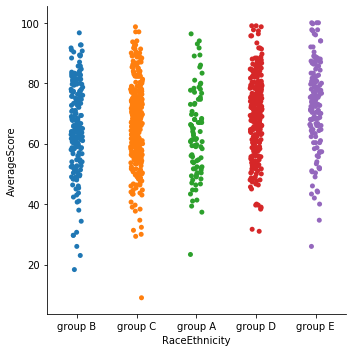

In [147]:
# plot of average score in each group
sns.catplot(x = 'RaceEthnicity', y = 'AverageScore',data=df)

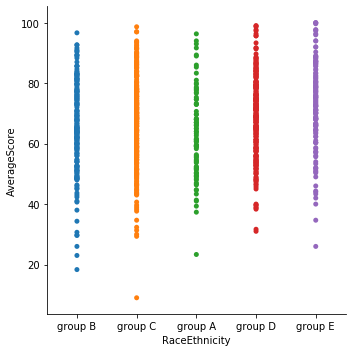

In [148]:
# plot of average score in each group
sns.catplot(x = 'RaceEthnicity', y = 'AverageScore',data=df, jitter = False)

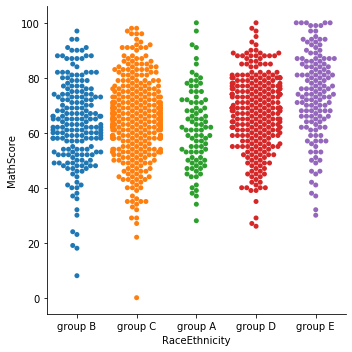

In [149]:
# plot of math score in each group
sns.catplot(x = 'RaceEthnicity', y = 'MathScore',data=df, kind = 'swarm')

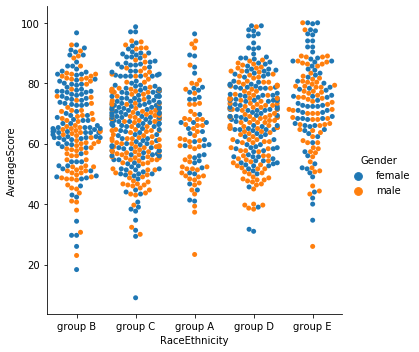

In [150]:
# plot of average score in each group with gender
sns.catplot(x = 'RaceEthnicity', y = 'AverageScore',data=df, kind = 'swarm',hue='Gender')

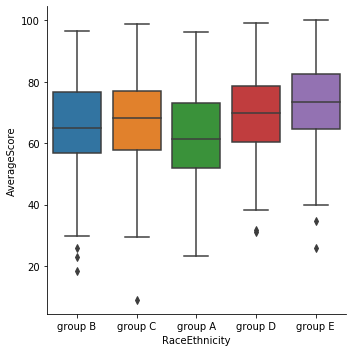

In [151]:
# plot of average score in each group 
sns.catplot(x = 'RaceEthnicity', y = 'AverageScore',data=df, kind = 'box')

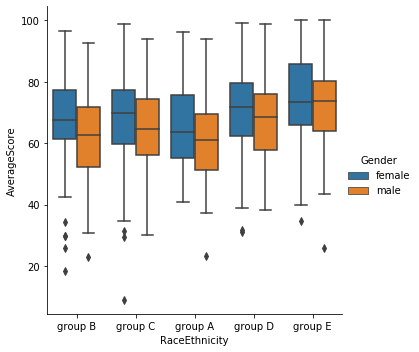

In [152]:
# plot of average score in each group with sex
sns.catplot(x = 'RaceEthnicity', y = 'AverageScore',data=df, kind = 'box',hue='Gender')

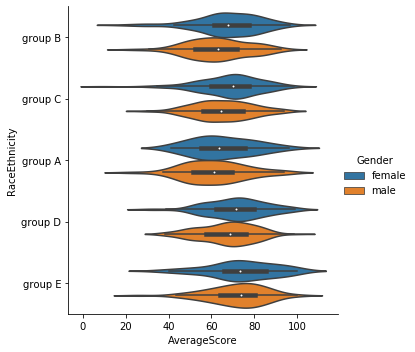

In [153]:
sns.catplot(y = 'RaceEthnicity', x = 'AverageScore',data=df, kind = 'violin', hue='Gender')

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

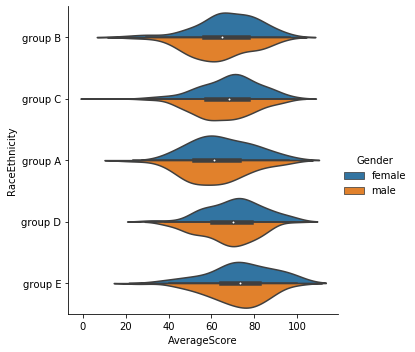

In [154]:
sns.catplot(y = 'RaceEthnicity', x = 'AverageScore',data=df, kind = 'violin', hue='Gender',split=True)

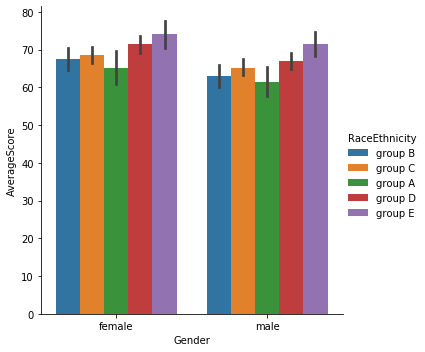

In [155]:
# Bar plots
# plot of average score in each gender with different group
sns.catplot(y = 'AverageScore', x = 'Gender',data=df, kind = 'bar', hue='RaceEthnicity')

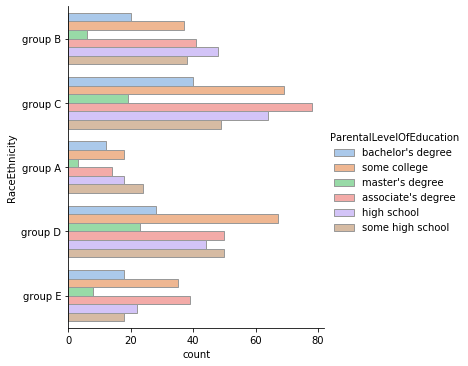

In [161]:
# plot of education type in each group
sns.catplot(y = 'RaceEthnicity',data=df, kind = 'count', hue='ParentalLevelOfEducation',palette='pastel',edgecolor='.6')

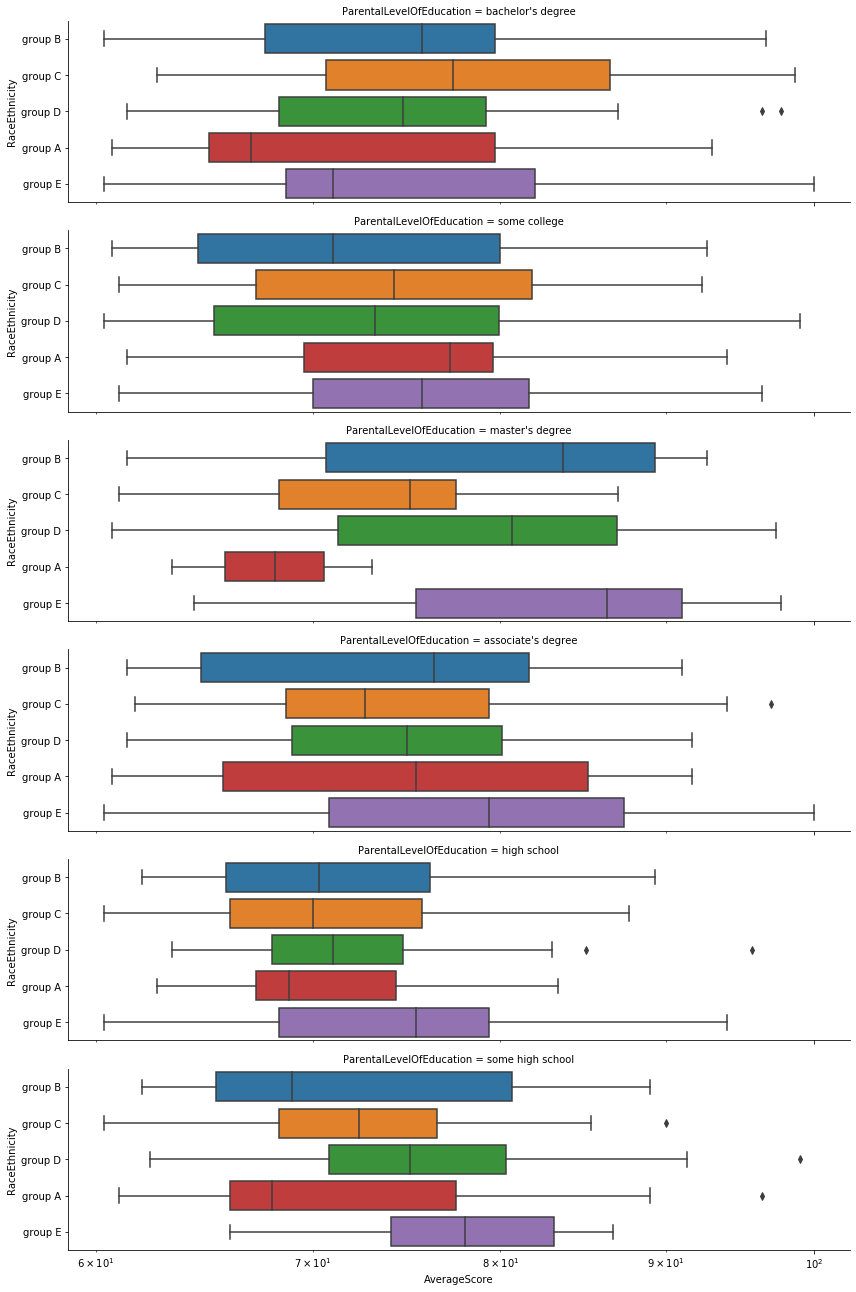

In [162]:
# plot of each education type in group with greater than 60
g = sns.catplot(x='AverageScore',y='RaceEthnicity',row='ParentalLevelOfEducation',
                kind='box',orient='h',height=3, aspect=4,
                data = df.query("AverageScore>60")
               )
g.set(xscale='log')